# GEOS 505 Assigment #1

## Background & Data Description
The data I am working with is load displacement data collected using the IFIT semi-circular bend test protocol. The test is a 3 point bend test of asphalt mixtures conducted near room temperature and at a loading rate of 50 mm/min. The test has been shown to be sensitive to Reclaimed Asphalt Pavement content and is being conducted as part of a Idaho Transportation Department project to assess the impact of RAP perentage on the susceptibility of fatigue cracking. The test equipment produces a text file with header information calculated from the load/displcacment data, followed by load/displacement measurements. The data I'm interested in is in the header. Therefore, I need to open every text file, pull out the important header information, and compile it for statistical analysis and plotting. The text file headers are not comma separated to I will have to use the fixed location of the data. The text files are aranged in subdirectories named by project key number, and so the subdirectory name will be required to differentiate the data by project. For this assigment, I will collect all relavent information from the files, but I will only be plotting the Flexibility Index.

## Step 1 - Initialization
I begin by initialize the modules I will need. As I'm working with files in multiple directories, I will need the os module. Aslo I will need numpy and matplotlib for array operations and plotting:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Step 2 - Finding a list of files and subdirectories
To open and work with each file, I first need a list of all files and associated subdirectories so I can build path names with which to open the files:

In [2]:
file_list = [] #Initialize filer list.
folder = [] #Initialize folder list.
for dirName, subdirList, fileList in os.walk('.'): #Use OS.walk to walk each folder and directory and create a path name     
    for fname in fileList:                         #to each file.
        if fname.endswith("results.txt"):          #Condition on which files to open.
            path = dirName + '\\' + fname          #Build windows readable path neam.
            split = path.split("\\")
            folder = folder + [split[1]]           #Build a separate list of folders to use for lables
            file_list = file_list + [path]

## Step 3 - Open each file and pull out specific header info
Next, I will open every file in file_list for reading and read specific header info (e.g., Flexibility Index, Strength, Fracture Energy etc.) to a numpy array. I should have probably used a list as I never really use the numpy array functionality and really use the arrays like lists. Also, the plot function uses lists of lists for the data (multiple plots). However, I started with this approach and so I have not revised the code. I'm using the readlines() method because the data isn't in a csv file or some other common delimited format so I'm unable to use Pandas.

In [3]:
frac1 = np.array([0.0])                                #Intitialize arrays for each desired parameter. 
slope1 = np.array([0.0])
stren1 = np.array([0.0])
flex1 = np.array([0.0])
secstif1 = np.array([0.0])
for i in range(0,len(folder),1):                       #For loop to loop through reach file and open them.
    with open(file_list[i],'r') as f:
        #Create Fracture Energy array
        lines = f.readlines()                         
        x = lines[26]
        x = x.split()                                  #Here I used split and visually inspected the results to find the         
        frac2 = np.array([float(x[3])])                #precise location of each of the desired parameters.
        frac2 = np.concatenate([frac1,frac2])
        frac1 = frac2
        #Create Slope array
        x = lines[27]
        x = x.split()
        slope2 = np.array([float(x[2])])
        slope2 = np.concatenate([slope1,slope2])
        slope1 = slope2    
        #Create Strength array
        x = lines[28]
        x = x.split()
        stren2 = np.array([float(x[2])])
        stren2 = np.concatenate([stren1,stren2])
        stren1 = stren2
        #Create Flexibility Index array
        x = lines[29]
        x = x.split()
        flex2 = np.array([float(x[2])])
        flex2 = np.concatenate([flex1,flex2])
        flex1 = flex2  
        #Create Secant Stiffness array
        x = lines[27]
        x = x.split()
        secstif2 = np.array([float(x[2])])
        secstif2 = np.concatenate([secstif1,secstif2])
        secstif1 = secstif2        

## Step 4 - Create RAP content array
As RAP content is not included in the test data, I have to use the project key numbers (stored in the subdirectory names (folder) to assign a RAP content to each file opened. 

In [4]:
rap = [None]*len(folder)
for i in range(0,len(folder),1):
    test = folder[i]
    if test == '13463':             
        rap[i] = 50.7
    elif test == '13935':
        rap[i] = 29.0
    elif test == '18784 17%':
        rap[i] = 16.3
    elif test == '18784 30%':
        rap[i] = 29.8
    elif test == '18784 40%':
        rap[i] = 45.2
    elif test == '19412':
        rap[i] = 29.2
    elif test == '19589':
        rap[i] = 29.9
    elif test == '19727':
        rap[i] = 29.01
    elif test == 'IMC_FAA_P401':
        rap[i] = 0.0
    elif test == '13106':
        rap[i] = 35.4
    elif test == 'IMC_ACHD':
        rap[i] = 29.6

## Step 5 - Create an multidimensional array to hold all paramaters
Here, I combine all parameter vectors into a ndarray called table. I will use this table to split the data up by project no.

In [5]:
rap = np.asarray(rap)
frac = np.asarray(frac2[1:])
slope = np.asarray(slope2[1:])
stren = np.asarray(stren2[1:])
flex = np.asarray(flex2[1:])
secstif = np.asarray(secstif2[1:])
table = np.column_stack((rap,flex,frac,slope,stren,secstif))

## Step 6 - Slice the data (table) up by project number
Admittedly, I should have done this before creating the RAP data array. However, because I was not using a list, I can't use the project names directly to split the table. Therefore, I ensured that all RAP contents have unique values and used these values to split the table by projects. 

In [6]:
for i in range(0,len(table)-1,1):
    if table[i+1,0] != table[i,0]:
        d1, table = table[0:i,:], table[i+1:,:]
        break
for i in range(0,len(table)-1,1):
    if table[i+1,0] != table[i,0]:
        d2, table = table[0:i+1,:], table[i+1:,:]
        break
for i in range(0,len(table)-1,1):
    if table[i+1,0] != table[i,0]:
        d3, table = table[0:i+1,:], table[i+1:,:]
        break
for i in range(0,len(table)-1,1):
    if table[i+1,0] != table[i,0]:
        d4, table = table[0:i+1,:], table[i+1:,:]
        break
for i in range(0,len(table)-1,1):
    if table[i+1,0] != table[i,0]:
        d5, table = table[0:i+1,:], table[i+1:,:]
        break
for i in range(0,len(table)-1,1):
    if table[i+1,0] != table[i,0]:
        d6, table = table[0:i+1,:], table[i+1:,:]
        break
for i in range(0,len(table)-1,1):
    if table[i+1,0] != table[i,0]:
        d7, table = table[0:i+1,:], table[i+1:,:]
        break
for i in range(0,len(table)-1,1):
    if table[i+1,0] != table[i,0]:
        d8, table = table[0:i+1,:], table[i+1:,:]
        break
for i in range(0,len(table)-1,1):
    if table[i+1,0] != table[i,0]:
        d9, table = table[0:i+1,:], table[i+1:,:]
        break
for i in range(0,len(table)-1,1):
    if table[i+1,0] != table[i,0]:
        d10, table = table[0:i+1,:], table[i+1:,:]
        break
d11 = table

## Step 7 - Create data lists, label lists and plot.
In this final step, I compile the data created in the previous step into a list of vectors (only the RAP column). I also manually created a list of x tick labels for matplotlib.

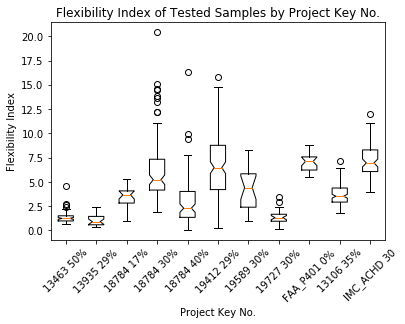

In [7]:
data = [d1[:,1],d2[:,1],d3[:,1],d4[:,1],d5[:,1],d6[:,1],d7[:,1],d8[:,1],d9[:,1],d10[:,1],d11[:,1]]  #list of data.
labels = ['13463 50%','13935 29%','18784 17%','18784 30%',
          '18784 40%','19412 29%','19589 30%','19727 30%','FAA_P401 0%','13106 35%','IMC_ACHD 30']  #X tick labels.

ax = plt.boxplot(data, labels=labels, notch='true')  #Plot the data with boxplot and confidence interval notches
plt.xticks(rotation=45)
plt.xlabel('Project Key No.')
plt.ylabel('Flexibility Index')
plt.title('Flexibility Index of Tested Samples by Project Key No.')
plt.show()